In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import os
from warnings import filterwarnings ; filterwarnings('ignore')

In [3]:
df = pd.read_excel("personal finance data.xlsx")

In [5]:
df

,Date / Time,Mode,Category,Sub category,Income/Expense,Debit/Credit
0,2021-01-01 21:45:00,CUB - online payment,Allowance,From dad,Income,8000.0
1,2021-01-01 21:46:00,CUB - online payment,Food,Snacks,Expense,85.0
2,2021-01-03 18:21:00,CUB - online payment,Other,From dad,Income,500.0
3,2021-01-03 18:22:00,CUB - online payment,Household,Stuffs,Expense,6667.0
4,2021-01-03 18:56:00,CUB - online payment,Transportation,Metro,Expense,30.0
...,...,...,...,...,...,...
220,2021-12-30 12:37:00,CUB - online payment,Other,From Deepak,Income,250.0
221,2021-12-30 12:43:00,CUB - online payment,Food,Horlicks + kolakattai,Expense,25.0
222,2021-12-30 13:36:00,CUB - online payment,Salary,office,Income,55530.0
223,2021-12-30 13:56:00,CUB - online payment,Transportation,Pg to office,Expense,43.0


In [7]:
df.head(5)

,Date / Time,Mode,Category,Sub category,Income/Expense,Debit/Credit
0,2021-01-01 21:45:00,CUB - online payment,Allowance,From dad,Income,8000.0
1,2021-01-01 21:46:00,CUB - online payment,Food,Snacks,Expense,85.0
2,2021-01-03 18:21:00,CUB - online payment,Other,From dad,Income,500.0
3,2021-01-03 18:22:00,CUB - online payment,Household,Stuffs,Expense,6667.0
4,2021-01-03 18:56:00,CUB - online payment,Transportation,Metro,Expense,30.0


In [9]:
df.tail(5)

,Date / Time,Mode,Category,Sub category,Income/Expense,Debit/Credit
220,2021-12-30 12:37:00,CUB - online payment,Other,From Deepak,Income,250.0
221,2021-12-30 12:43:00,CUB - online payment,Food,Horlicks + kolakattai,Expense,25.0
222,2021-12-30 13:36:00,CUB - online payment,Salary,office,Income,55530.0
223,2021-12-30 13:56:00,CUB - online payment,Transportation,Pg to office,Expense,43.0
224,2021-12-30 14:10:00,CUB - online payment,Food,To barath,Expense,20.0


In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 225 entries, 0 to 224
Data columns (total 6 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   Date / Time     225 non-null    datetime64[ns]
 1   Mode            225 non-null    object        
 2   Category        225 non-null    object        
 3   Sub category    225 non-null    object        
 4   Income/Expense  225 non-null    object        
 5   Debit/Credit    225 non-null    float64       
dtypes: datetime64[ns](1), float64(1), object(4)
memory usage: 10.7+ KB


In [13]:
df.describe()

,Date / Time,Debit/Credit
count,225,225.000000
mean,2021-07-06 02:51:24.266666752,3768.890133
min,2021-01-01 21:45:00,8.000000
25%,2021-02-21 15:40:00,80.000000
50%,2021-06-22 16:41:00,200.000000
75%,2021-11-28 19:59:00,700.000000
max,2021-12-30 14:10:00,55530.000000
std,NaN,12353.959576


In [15]:
# Check unique values
print(df['Category'].unique())

['Allowance' 'Food' 'Other' 'Household' 'Transportation' 'apparel'
 'salary' 'Apparel' 'Education' 'Salary']


In [17]:
print(df['Mode'].unique())

['CUB - online payment']


In [19]:
# Convert 'Date / Time' to datetime
df['Date / Time'] = pd.to_datetime(df['Date / Time'])

In [21]:
# Standardize strings
df['Category'] = df['Category'].str.title()
df['Sub category'] = df['Sub category'].str.title()
df['Mode'] = df['Mode'].str.title()
df['Income/Expense'] = df['Income/Expense'].str.title()

In [23]:
# Ensure 'Debit/Credit' is numeric
df['Debit/Credit'] = pd.to_numeric(df['Debit/Credit'], errors='coerce')


In [25]:
# Total income and expense

total_income = df[df['Income/Expense'] == 'Income']['Debit/Credit'].sum()
total_expense = df[df['Income/Expense'] == 'Expense']['Debit/Credit'].sum()
print("Total Income:", total_income)
print("Total Expense:", total_expense)
print("Total Savings:", total_income - total_expense)


Total Income: 698147.0
Total Expense: 149853.28
Total Savings: 548293.72


In [27]:
## Category-wise & Subcategory-wise Summary

category_summary = df.groupby('Category')['Debit/Credit'].sum()
subcategory_summary = df.groupby('Sub category')['Debit/Credit'].sum()
print(category_summary)
print(subcategory_summary)


Category
Allowance          13000.00
Apparel            11674.72
Education          14000.00
Food               24607.76
Household          54810.00
Other              53124.00
Salary            660910.00
Transportation     15873.80
Name: Debit/Credit, dtype: float64
Sub category
Arrear And Reval Fee     14000.0
Auto To Gobi'S Place       214.0
Badminton                  200.0
Banana                      10.0
Bean Bag                  8297.0
                          ...   
Vishnu 100 Gowdham 25      125.0
Vnr To Apk                  50.0
Water                       70.0
Zinger Box Meal            279.0
Zomato                     269.4
Name: Debit/Credit, Length: 134, dtype: float64


In [29]:
## Mode Analysis

mode_summary = df.groupby('Mode')['Debit/Credit'].sum()
print(mode_summary)


Mode
Cub - Online Payment    848000.28
Name: Debit/Credit, dtype: float64


In [31]:
## Monthly Trend 

df['Month'] = df['Date / Time'].dt.to_period('M')
monthly_expense = df[df['Income/Expense']=='Expense'].groupby('Month')['Debit/Credit'].sum()
monthly_income = df[df['Income/Expense']=='Income'].groupby('Month')['Debit/Credit'].sum()


In [33]:
## Visualizations

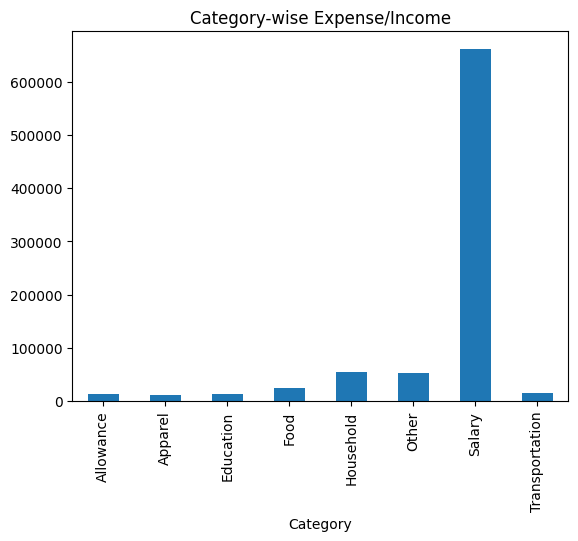

In [35]:
# Category-wise bar chart
category_summary.plot(kind='bar', title='Category-wise Expense/Income')
plt.show()

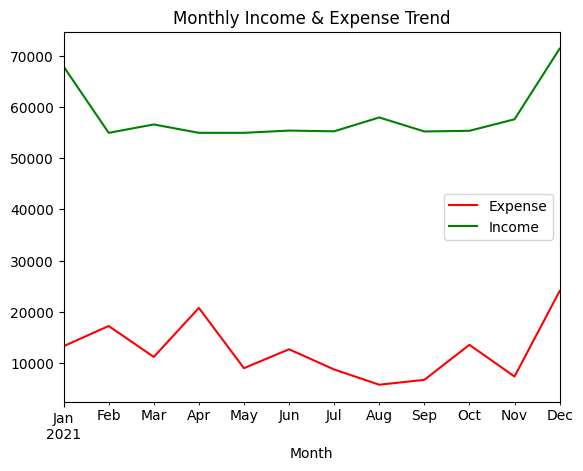

In [37]:
# Monthly trend line
monthly_expense.plot(kind='line', color='red', label='Expense')
monthly_income.plot(kind='line', color='green', label='Income')
plt.legend()
plt.title('Monthly Income & Expense Trend')
plt.show()

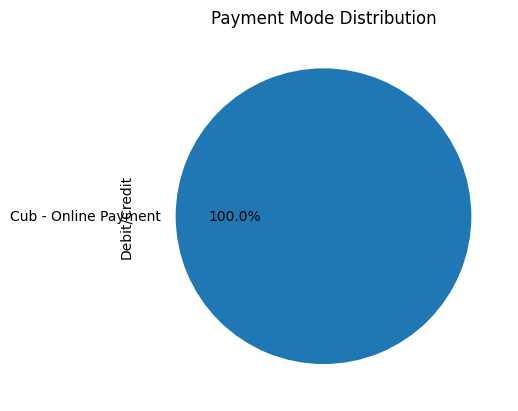

In [39]:
# Mode-wise pie chart
mode_summary.plot(kind='pie', autopct='%1.1f%%', title='Payment Mode Distribution')
plt.show()

In [41]:
## Pythonic Functions & Optional OOP

In [43]:
# Function to get top category
def top_category(df):
    return df.groupby('Category')['Debit/Credit'].sum().idxmax()

In [45]:
# Function to get monthly summary
def monthly_summary(df):
    df['Month'] = df['Date / Time'].dt.to_period('M')
    return df.groupby(['Month', 'Income/Expense'])['Debit/Credit'].sum().unstack()

In [47]:
class FinanceTracker:
    def __init__(self, dataframe):
        self.df = dataframe
    
    def total_income(self):
        return self.df[self.df['Income/Expense']=='Income']['Debit/Credit'].sum()
    
    def total_expense(self):
        return self.df[self.df['Income/Expense']=='Expense']['Debit/Credit'].sum()
    
    def top_category(self):
        return self.df.groupby('Category')['Debit/Credit'].sum().idxmax()


In [49]:
## Save summary/ Results

In [51]:
summary = df.groupby('Category')['Debit/Credit'].sum()
summary.to_csv('category_summary.csv')
monthly_summary(df).to_csv('monthly_summary.csv')
